In [1]:
import pandas as pd

In [2]:
pt_pd = pd.read_csv("./tmp_dict/www.shanezhang.com/prolonged_traffic.txt", sep = '\t', header = None)

In [3]:
import requests

In [4]:
get = requests.get("https://ipinfo.io/8.8.8.8/org?token=2c732d429c11a8").content.decode().strip()

In [5]:
pt_pd['org'] = pt_pd.apply(lambda x: requests.get("https://ipinfo.io/%s/org?token=2c732d429c11a8"%x[0]).content.decode().strip(), axis = 1)

In [6]:
pt_pd

,0,1,org
0,172.67.144.77,0,"AS13335 Cloudflare, Inc."
1,104.208.16.90,0,AS8075 Microsoft Corporation
2,factor,50,"{\n ""status"": 404,\n ""error"": {\n ""title""..."


In [7]:
import os

In [8]:
os.environ["mmpath"] = "/"

In [9]:
from subprocess import check_output

In [10]:
from collections import defaultdict

In [12]:
output_lst = defaultdict(list)

In [13]:
for i in [0.00]:
    pt_pd[1] = pt_pd.apply(lambda x: i if "AS13335" in x['org'] else x[1], axis = 1)
    pt_pd[[0,1]].to_csv("./tmp_dict/www.shanezhang.com/prolonged_traffic.txt", header = None, index = None, sep = "\t")
    for _ in range(100):
        output_lst[i].append(check_output("python replay.py http://www.shanezhang.com replay", shell = True))
    os.system("mv plTime/www.shanezhang.com plTime/www.shanezhang.com.%s" % i)

In [15]:
plt_dict = {}
for i in [ 0.00]:
    plt_dict[i] = pd.read_csv("plTime/www.shanezhang.com.%s" % i, header = None, sep = '\t')

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'www.shanezhang.com/80pic.html')

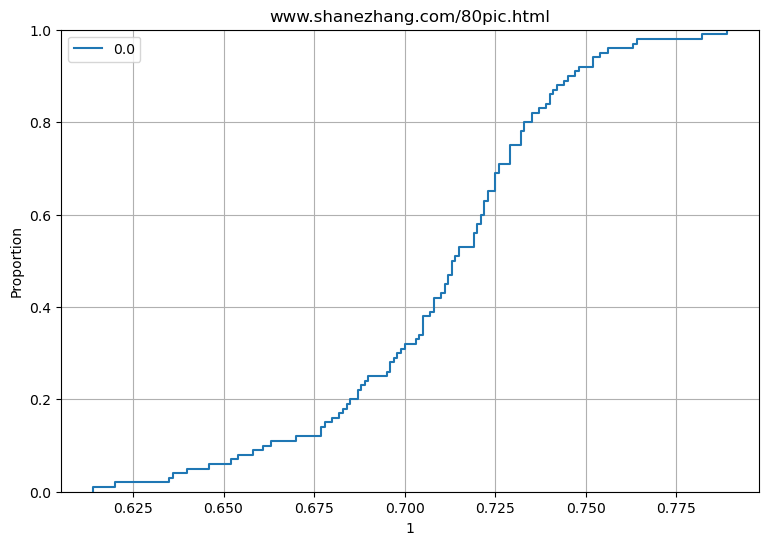

In [20]:
plt.figure(figsize=(9,6))
for each in plt_dict:
    sns.ecdfplot(plt_dict[each][plt_dict[each][0] == "PLT"][1], label = each.__str__())
plt.grid()
plt.legend()
plt.title("www.shanezhang.com/80pic.html")

In [60]:
for each in plt_dict:
    print (each, plt_dict[each][plt_dict[each][0] == "PLT"][1].median())

0.01 0.7155
0.02 0.717
0.03 0.723
0.04 0.735
0.05 0.747
0.06 0.7395
0.07 0.8115000000000001
0.08 0.823
0.09 0.8385
0.1 0.846


In [52]:
len(output_lst)

11

In [53]:
connect_session_info_pic2 = output_lst

In [54]:
%store connect_session_info_pic2

Stored 'connect_session_info_pic2' (defaultdict)
